
# Mushroom


## 1. Sobre o Dataset

Este conjunto de dados inclui descrições de amostras hipotéticas correspondentes a 23 espécies de cogumelos com guelras na Família __Agaricus e Lepiota__ (pp. 500-525). Cada espécie é identificada como definitivamente comestível, definitivamente venenosa ou de comestibilidade desconhecida e não recomendada. Esta última classe foi combinada com a venenosa. O Guia afirma claramente que não há uma regra simples para determinar a comestibilidade de um cogumelo; nenhuma regra como ``folhetos três, deixe estar'' para Carvalho Venenoso e Hera.

### 1. 2 Sobre a espécie Agaricus

__Nome científico__: Agaricus sp.  
__Família__: Agaricaceae  
__Distribuição geográfica__: Cosmopolita  
__Características morfológicas__: Apresenta basidioma macio de tamanho médio a grande; o chapéu é hemisférico inicialmente, depois convexo e finalmente mais ou menos aplanado ou ligeiramente deprimido, de cor esbranquiçada ou parda. O pé (estipe) é cilíndrico, tanto regular como engrossado ou atenuado para a base; sempre porta um anel, mais ou menos desenvolvido, que pode ser persistente ou caduco e se separa com facilidade da carne do chapéu.  
__Características interessantes__: O gênero Agaricus é um importante gênero de cogumelos, contendo tanto espécies comestíveis como venenosas. Uma de suas espécies é o cogumelo comum (champignon de Paris, Agaricus bisporus). Algumas espécies, como Agaricus blazei, têm sido estudadas porque contém complexos de polissacarídeo-proteína que podem apresentar atividade no sistema imunológico humano entre outras utilidades medicinais. 

Fonte: https://museunacional.ufrj.br/hortobotanico/Fungos/Agaricus.html

### 1.3. Sobre a espécie Lepiota

__Nome cientigico__: Lepiota sp.  
__Família__: Agaricaceae  
__Características morfológicas__: Tipicamente têm aneis nos estipes, os quais, nas espécies maiores, são soltos podendo deslizar para cima e para baixo ao longo do pé. O píleo normalmente tem escamas: as cores do píleo, lamelas e escamas são importantes na determinação exacta da espécies, bem como por vezes o odor.  

Fonte: https://www.inaturalist.org/taxa/58695-Lepiota

## 2. Objetivo do Estudo: Classificar Cogumelos tóxicos de comestíveis

## 3. Variáveis encontradas no Dataset

In [190]:
from IPython.display import Image, display

display(Image(url='https://elysios.com.br/wp-content/uploads/2021/07/Estrutura-basica-do-cogumelo-2.png'))



1. cap-shape (Formato do chapéu):         bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2. cap-surface (Superfície do chapéu):    fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color (Cor do chapéu):             brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

4. bruises? (Machucados):                 bruises=t,no=f

5. odor (Odor):                           almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

6. gill-attachment (Fixação de Gueiras):  attached=a,descending=d,free=f,notched=n

7. gill-spacing (Espaçamento de gueiras): close=c,crowded=w,distant=d

8. gill-size (Tamanho de Gueiras):        broad=b,narrow=n

9. gill-color (Cor de Gueiras):           black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

10. stalk-shape (Formato de talo):        enlarging=e,tapering=t

11. stalk-root (Raiz de talo):            bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring (Suerfície de talo acima do anel): fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring (Superfície de talo abaixo do anel): fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring (Cor de talo acima do anel):   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring (Cor-de-talo-abaixo-do-anel):   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

16. veil-type (Tipo de véu):               partial=p,universal=u

17. veil-color (Cor de véu):               brown=n,orange=o,white=w,yellow=y

18. ring-number (Número de anel):          none=n,one=o,two=t

19. ring-type (Tipo de anel):              cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

20. spore-print-color (cor de impressao de esporos):        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yell

21. population (População):               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

22. habitat (Habitat):                    grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

#### Variaveis Target 

edible=e
poisonous=p


## 4. Bibliotecas

In [24]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [25]:
#Divisão do Dataset
from sklearn.model_selection import train_test_split

#Pipeline e pré-processamento
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_transformer #pipeline com colunas de tipos diferentes
from sklearn.preprocessing import OneHotEncoder #Transformação de dados categoricos
from sklearn.feature_selection import SelectKBest, mutual_info_classif #selecao de features

#Algoritimos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Métricas para validação do modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score


#Validação cruzada do modelo
from sklearn.model_selection import cross_val_score

In [26]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
# Modelo
lgb_model = LGBMRegressor()


## 5. Abrindo os Datasets

In [27]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 


In [7]:
# metadata 
print(mushroom.metadata)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [8]:
# variable information 
mushroom.variables['description']

0                                                  None
1     bell=b,conical=c,convex=x,flat=f, knobbed=k,su...
2                  fibrous=f,grooves=g,scaly=y,smooth=s
3     brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...
4                                        bruises=t,no=f
5     almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...
6              attached=a,descending=d,free=f,notched=n
7                           close=c,crowded=w,distant=d
8                                      broad=b,narrow=n
9     black=k,brown=n,buff=b,chocolate=h,gray=g, gre...
10                               enlarging=e,tapering=t
11    bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,...
12                   fibrous=f,scaly=y,silky=k,smooth=s
13                   fibrous=f,scaly=y,silky=k,smooth=s
14    brown=n,buff=b,cinnamon=c,gray=g,orange=o, pin...
15    brown=n,buff=b,cinnamon=c,gray=g,orange=o, pin...
16                                partial=p,universal=u
17                    brown=n,orange=o,white=w,y

### 5.1 Alvo (Target)

In [28]:
y = mushroom.data.targets['poisonous']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

### 5.2 Dataset  de treino

In [29]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [30]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [31]:
X.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [32]:
y = mushroom.data.targets['poisonous'].map({'e': 0, 'p': 1})
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: poisonous, Length: 8124, dtype: int64

## 6. Treinando o modelo

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,f,f,n,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
6654,f,s,e,f,y,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l
5606,x,y,n,f,f,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,l
3332,f,y,g,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,n,y,d
6988,f,s,e,f,s,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,k,s,e,f,f,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,p
1149,f,s,n,f,n,f,w,b,h,t,...,s,w,w,p,w,o,e,k,a,g
4999,x,y,n,f,f,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p
7497,k,y,n,f,y,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p


In [35]:
y_test

1971    0
6654    1
5606    1
3332    0
6988    1
       ..
7374    1
1149    0
4999    1
7497    1
3341    1
Name: poisonous, Length: 1625, dtype: int64

#### LogisticRegression

In [53]:
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'] 


# Transformador categórico
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Pipeline final com Logistic Regression
pipelinelog = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])



pipelinelog.fit(X_train, y_train)


y_predLogistic = pipelinelog.predict(X_test)
y_predLogistic

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

Sobre o SelectKBest: 
O SelectKBest faz parte do pre-processamento dos dados podendo ser utlizado somente com algoritimos de classificação.

Na etapa "feature_selection" foi utilizado o metodo "SelectkBest" para selecionar os 10 principais parametros.
Para que essa escolha dos parâmetros pelo método ocorresse de forma mais eficiente foi utilizado o "Score_func" = mutual_info_classif. 
O Mutual_info_classif é uma função de classificação que avalia a dependência mútua entre cada característica e a variável alvo.
Após a seleção dos parâmetros(características) pela função, são selecionados os 10 melhores (k=10) para serem utilizados no modelo.


### DecisionTreeClassifier

In [54]:
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'] 


# Transformador categórico
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Pipeline final com  DecisionTreeClassifier
pipelinetree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=mutual_info_classif, k=10)),
    ("model", DecisionTreeClassifier())
])


pipelinetree.fit(X_train, y_train)

y_predDecisionTree = pipelinetree.predict(X_test)
y_predDecisionTree



array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### KNeighborsClassifier

In [55]:
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'] 

# Transformador categórico
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Pipeline final com KNeighborsClassifier
pipelineKNG = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=mutual_info_classif, k=10)),
    ("model", KNeighborsClassifier())
])


pipelineKNG.fit(X_train, y_train)


y_predKNG = pipelineKNG.predict(X_test)
y_predKNG

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

## 7. Avaliando o Modelo de Classificação

### 7.1 Matriz Confusão

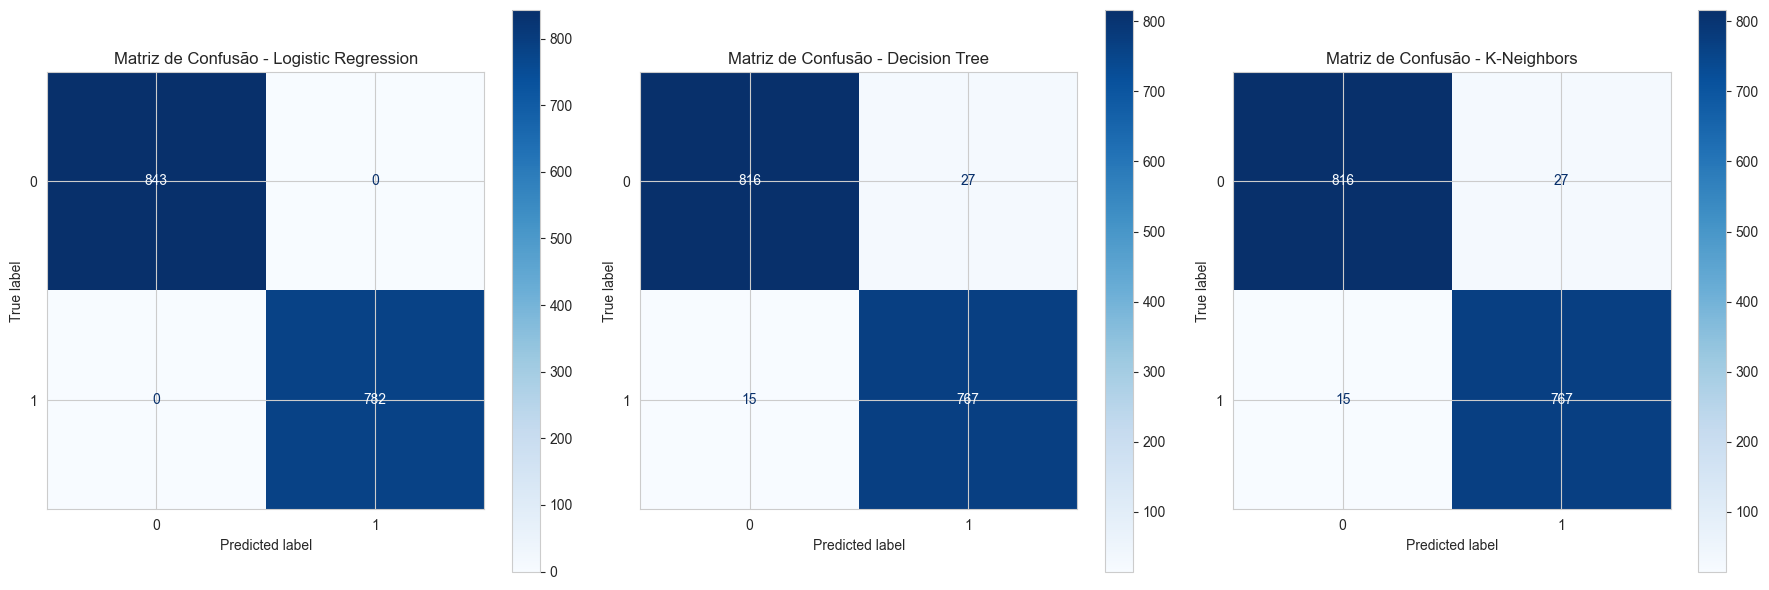

In [56]:
models = {
   "Logistic Regression": pipelinelog,
    "Decision Tree": pipelinetree,
    "K-Neighbors": pipelineKNG
}

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

# Treinar e plotar a matriz de confusão para cada modelo
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Exibir a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, values_format='d')
    axes[i].set_title(f'Matriz de Confusão - {model_name}')


plt.tight_layout()
plt.show()

O modelo está predominantemente com altos Verdadeiros Positivos (TP) e Verdadeiros Negativos (TN) o que indica que está classificando corretamente a maioria dos casos.

### 7.2 Métricas de desempenho

In [57]:
# Dicionário com as previsões dos modelos
models_predictions = {
    "LogisticRegression": y_predLogistic,
    "DecisionTreeClassifier": y_predDecisionTree,
    "KNeighborsClassifier": y_predKNG,
}


results = []


for model_name, y_pred in models_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df = pd.DataFrame(results)


results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,1.000000,1.000000,1.000000,1.00000
1,DecisionTreeClassifier,0.974154,0.965995,0.980818,0.97335
2,KNeighborsClassifier,0.974154,0.965995,0.980818,0.97335


- A Acuracia(Accuracy: mede a proporção total de previsões corretas. No caso do modelo em questão, a acuracia esta em 97% em todos os casos, o que demonstra uma boa previsibilidade. Apesar da acuracia já indicar uma boa previsibilidade é importante análisar outras métricas para entender se, de fato, o modelo esta se comportando bem.
- A precisão(Precision): mede a proporção de verdadeiros positivos entre todos os previstos pelo modelo, ou seja, o quão provavel é em classificar corretamente as previsões. Neste caso, o modelo demonstra uma grande capacidade, visto que esta em 96%.  
- A Revocação(Recall): mede a força do modelo em prever um resultado positivo. No modelo em questão, a previsão esta em 98%, o que indica uma ótima previsibilidade.  
- F1-Score: mede o quanto a precisão e a revocação estão sendo eficientes. No caso em questão vemos uma boa eficiência entre os dois casos.  

### 7.3 Distribuição das Classes

In [47]:
y_train.value_counts()

0    3365
1    3134
Name: poisonous, dtype: int64

A distribuição de classes tem uma diferença de 3%, o que esta dentro do aceitável para o desenvolvimento de um modelo de classificação.

In [48]:
y_test.value_counts()

0    843
1    782
Name: poisonous, dtype: int64

### 7.4 Validação Cruzada

In [50]:
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'] 



categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Pipeline final com RandomForestClassifier
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=mutual_info_classif, k=10)),
    ("model", RandomForestClassifier())
])


# Realizar validação cruzada
scores = cross_val_score(pipeline, X_train, y_train, cv=5)


print(f'Acurácia média: {scores.mean():.4f}')
print(f'Desvio padrão da acurácia: {scores.std():.4f}')



Acurácia média: 0.9794
Desvio padrão da acurácia: 0.0029


A validação cruzada tem como função testar o desempenho do modelo criado. Aqui vemos que o modelo criado está desempenhando bem, logo que a acuracia esta em 97% e o desvio padrão em 0.0029.

### 7.5 Curva ROC e AUC

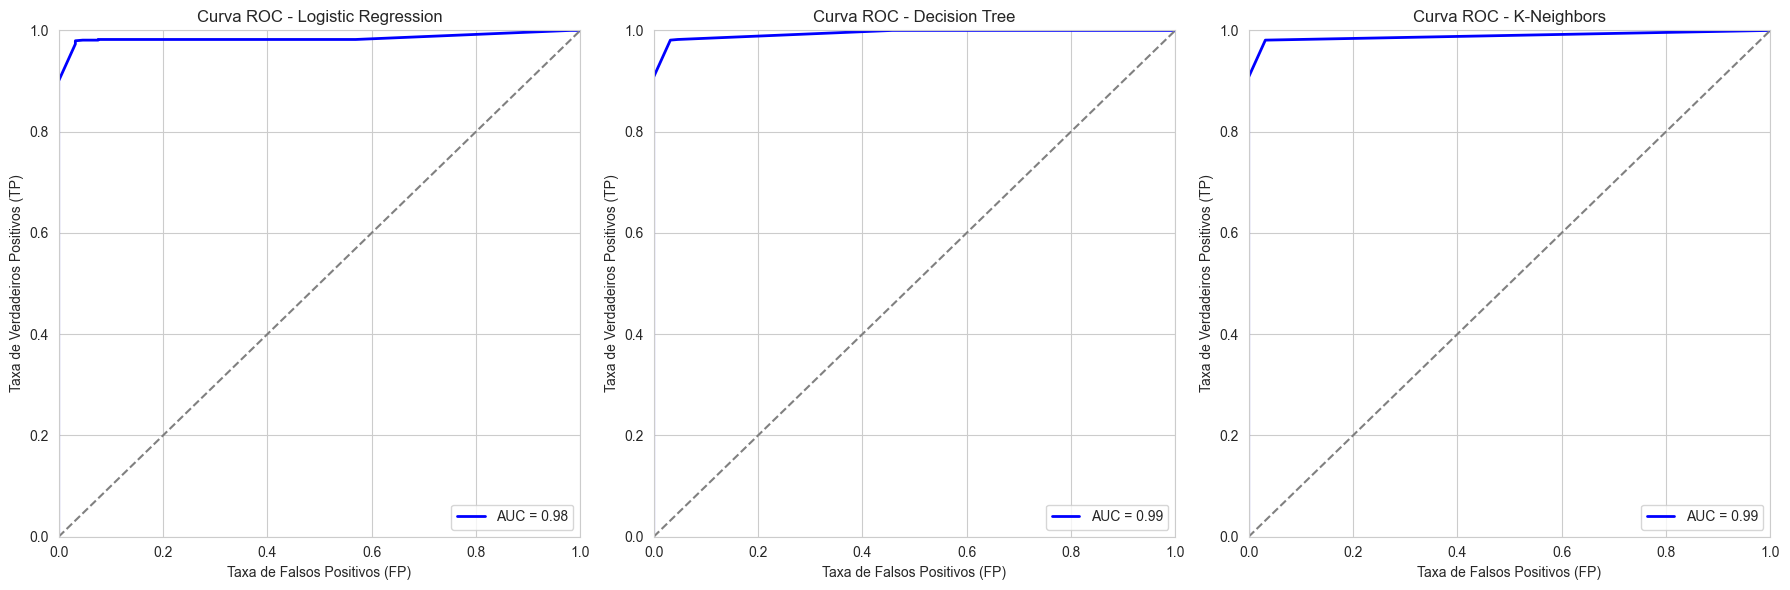

In [51]:
models = {
    "Logistic Regression": pipelinelog,
    "Decision Tree": pipelinetree,
    "K-Neighbors": pipelineKNG
}

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Treinar e plotar ROC para cada modelo
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular as métricas da curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotar a curva ROC
    axes[i].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[i].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.0])
    axes[i].set_xlabel('Taxa de Falsos Positivos (FP)')
    axes[i].set_ylabel('Taxa de Verdadeiros Positivos (TP)')
    axes[i].set_title(f'Curva ROC - {model_name}')
    axes[i].legend(loc="lower right")


plt.tight_layout()
plt.show()

O modelo possui uma métrica de área sob a curva (AUC) entre 0.98 - 0.99, correspondendo a um classificador relativamente bom, logo que quanto mais próximo de 1, melhor ele é.

## 8. Considerações Finais

Foram utilizados 3 classificadores: LogisticRegression,DecisionTreeClassifier e KNeighborsClassifier. Em todos os casos houve um ótimo desempenho para todas as metricas: Accuracy, Precision, Recall e F1-Score. Também foi realizada uma validação cruzada, com uma  acurácia média de 0.9794 e desvio padrão da acurácia e 0.0029. Sobre a curva ROC e AUC, também foram vistos ótimos desempenhos, logo que quanto mais proximo da esquerda e AUC mais proximo de 1, melhor desempenho ele possui.

## 8. Fonte do DataSet 

https://archive.ics.uci.edu/dataset/73/mushroom